In [73]:
import numpy as np
import torch
import torch.nn as nn

import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from random import choice

import random
import string
import math

import matplotlib.pyplot as plt
import numpy as np

from transformers import BertTokenizer, BartTokenizer, BartModel, BartForConditionalGeneration, AutoTokenizer, Text2TextGenerationPipeline, pipeline
from transformers import TrainingArguments, Trainer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset, load_dataset, load_from_disk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14743\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
import string
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize

reference = "The finals are best-of-5 series."
candidate = "The finals are best of 5 series."

word_tokenize(candidate)

# def listize(text):
#     table = str.maketrans("", "", string.punctuation)
#     return text.translate(table).split(" ")

reference = reference.replace("-", " ")
reference = word_tokenize(reference)
candidate = word_tokenize(candidate)
print(reference)
print(candidate)
sentence_bleu([reference], candidate, smoothing_function=SmoothingFunction().method1)

['The', 'finals', 'are', 'best', 'of', '5', 'series', '.']
['The', 'finals', 'are', 'best', 'of', '5', 'series', '.']


1.0

In [95]:
def text_preprocess(text):
    text = text.replace("-", " ")
    return word_tokenize(text)

def pair_bleu(reference, candidate):
    reference_lst = text_preprocess(reference)
    candidate_lst = text_preprocess(candidate)
    smooth_method = SmoothingFunction().method2
    return sentence_bleu([reference_lst], candidate_lst, smoothing_function=smooth_method)

pair_bleu("The finals are best-of-5 series.", "The finals are best of 5 series.")

1.0

In [52]:
val_originals = []
val_corrupted = []
val_bart = []
val_chatGPT = []

with open("val_original.txt", 'r') as f:
    for line in f:
        val_originals.append(line.rstrip())

with open("val_corrupted.txt", 'r') as f:
    for line in f:
        val_corrupted.append(line.rstrip())

with open("val_recovery.txt", 'r') as f:
    for line in f:
        val_bart.append(line.rstrip())

with open("chatGPT_val_recovery.txt", 'r') as f:
    for line in f:
        val_chatGPT.append(line.rstrip())

print(len(val_originals))
print(len(val_corrupted))
print(len(val_bart))
print(len(val_chatGPT))

395
395
395
100


In [96]:
def model_bleus(references, candidates):
    results = []
    for i in range(len(candidates)):
        results.append(pair_bleu(references[i], candidates[i]))
    return results

print("The average BLEU of original BART is {}".format(sum(model_bleus(val_originals, val_corrupted)) / len(val_corrupted)))
print("The average BLEU of original BART is {}".format(sum(model_bleus(val_originals, val_bart)) / len(val_bart)))
print("The average BLEU of original BART is {}".format(sum(model_bleus(val_originals, val_chatGPT)) / len(val_chatGPT)))

The average BLEU of original BART is 0.38943721001796594
The average BLEU of original BART is 0.49352184074212213
The average BLEU of original BART is 0.7187211221153279


In [90]:
def loss_plot(loss_hist, val_loss_hist, log=False):
    """
    This function plots the loss curves of training and validation.
    """
    plt.plot(loss_hist, label='training')
    if log:
        plt.yscale('log')
    plt.ylabel('loss')
    plt.legend(loc='lower left')
    plt.xlabel('step (training)')
    # plt.twiny()
    # plt.plot(val_loss_hist, 'r', label='validation')
    plt.xlabel('3 steps')
    plt.legend(loc='upper left')

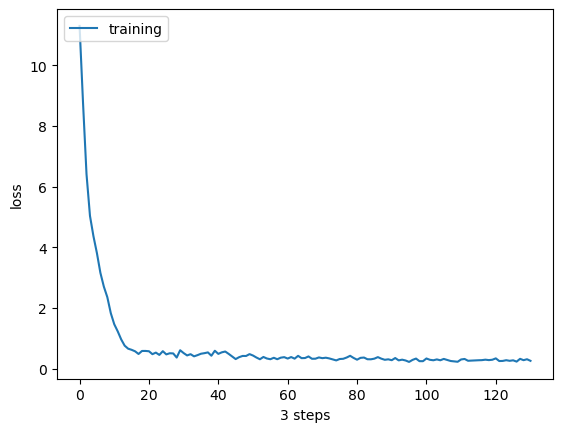

In [91]:
loss_bart_train = []
with open("loss_bart.txt", 'r') as f:
    for line in f:
        loss = line.rstrip().split("\t")[-1]
        loss_bart_train.append(float(loss))
len(loss_bart_train)
loss_plot(loss_bart_train, [])


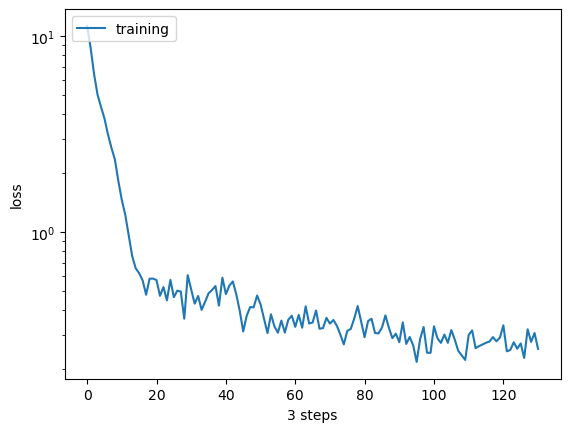

In [92]:
loss_plot(loss_bart_train, [], True)

Given the folloing corrupted text, output the original text.
Example:
input: ThE MuSIc Is lIKE WAteR; oR AiR aND i Fly IN it.
output: The music is like water; or air and I fly in it.
input: [text]